## 예제
1. test_csv폴더에 있는 '유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109'파일을 로드 
2. 각 컬럼의 이름을 ['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 기준년월을 시계열데이터로 변경
4. 성별 컬럼의 데이터를 1은 남자, 2는 여자로 변경, 9는 무관
5. 남, 녀 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 출력

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv", encoding='euc-kr')

In [3]:
df.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [4]:
df.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [5]:
df.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [6]:
# 판다스에서 지수표현 없애기 
pd.options.display.float_format = '{:2f}'.format

In [7]:
# 기준년월 데이터를 시계열 변경
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')

In [8]:
# 인덱스를 기준년월로 설정
df.set_index('기준년월', inplace=True)

In [9]:
# 괴상한 데이터 
df['연령대'].value_counts()

연령대
10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: count, dtype: int64

In [39]:
df.head(10)

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준년월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601
2019-01-01,백화점,남자,50,283968,31736078019.000000,2019,111759.346190
2019-01-01,백화점,남자,60,130554,16122234295.000000,2019,123490.925556
2019-01-01,백화점,남자,70,41998,4687676432.000000,2019,111616.658698
2019-01-01,백화점,남자,80,11198,1186133303.000000,2019,105923.674138


In [10]:
# 성별 컬럼에서 1은 남자 2는 여자 9는 무관

# case1
def change(x):
    if x == 1:
        result = '남자'
    elif x == 2:
        result = '여자'
    elif x == 9:
        result = '무관'
    else:
        result = "-"
    return result

df['성별'].apply(change).value_counts()

성별
여자    1336
남자    1312
Name: count, dtype: int64

In [11]:
df['성별'].apply(lambda x : "남자" if (x == 1) else ("여자" if (x ==2) else "무관"))

기준년월
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
              ..
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
Name: 성별, Length: 2648, dtype: object

In [12]:
df['성별'] = df['성별'].replace(
    {
        1 : '남자', 
        2 : '여자', 
        9 : "무관"
    }
)

In [13]:
df['성별'].value_counts()

성별
여자    1336
남자    1312
Name: count, dtype: int64

In [14]:
# 연도 파생변수 생성
df['연도'] = df.index.strftime('%Y')

In [41]:
df.index.year

Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       ...
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
      dtype='int32', name='기준년월', length=2648)

In [15]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도
기준년월,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019
2019-01-01,백화점,남자,10,379,19458720.000000,2019
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019


In [16]:
# 건당 이용금액 파생변수 생성
# 총이용금액 / 총이용건수
df['건당이용금액'] = df['총이용금액'] / df['총이용건수']

In [17]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준년월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


In [18]:
import platform

In [19]:
import matplotlib.pyplot as plt

In [20]:
# 그래프에서 한글 깨짐 방지 
if platform.system() == "Darwin":    # MAC 인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='연도,성별'>

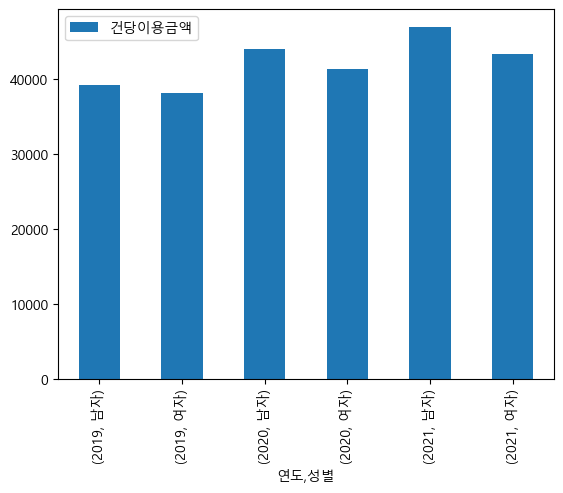

In [21]:
(df[['연도', "성별" ,'건당이용금액']].groupby(['연도', '성별']).mean()).plot.bar()

In [22]:
pivot = pd.pivot_table(
    df, 
    index= '연도', 
    columns = '성별', 
    aggfunc = "mean", 
    values = '건당이용금액'
)

<Axes: xlabel='연도'>

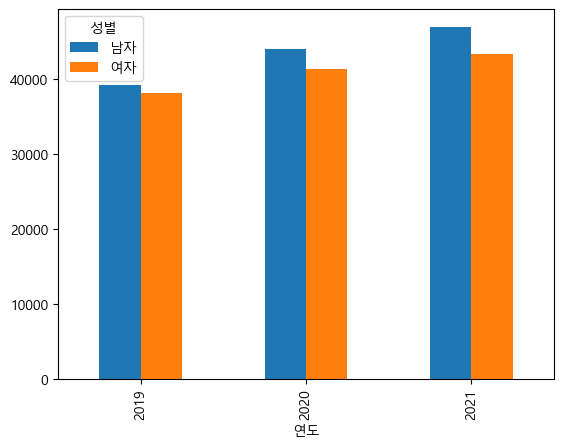

In [23]:
pivot.plot.bar()

### 온라인 카드 매출과 오프라인 카드 매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - 인덱스는 기준년월을 시계열로 변경한 데이터로 설정
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
    - 인덱스는 기준년월을 시계열로 변경한 데이터로 설정

In [24]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준년월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


In [25]:
group_data = df.groupby(df.index).sum()['총이용금액']

In [26]:
df_online = pd.read_csv("../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv")

In [27]:
df_online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [28]:
# 컬럼의 이름을 변경
df_online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [29]:
# 기준년월을 시계열로 변경하고 인덱스로 설정
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format='%Y%m')

In [30]:
df_online.set_index('기준년월', inplace=True)

In [31]:
# 그룹화
group_data2 = df_online.groupby('기준년월').sum()['총이용금액']

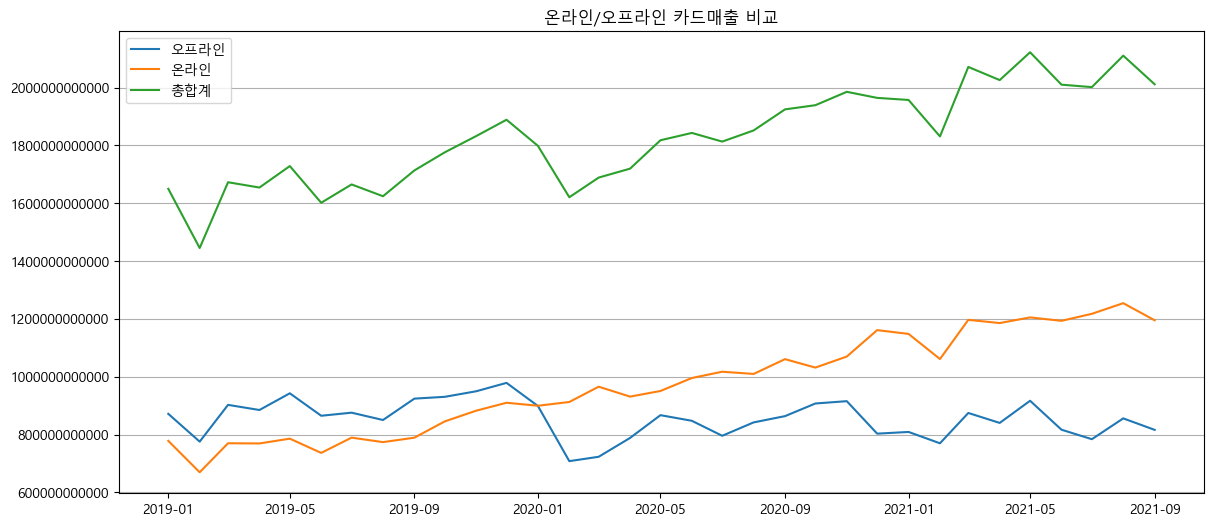

In [42]:
# 그래프로 시각화

# 그래프의 사이즈 변경
plt.figure(figsize = (14, 6))

# grid 추가
plt.grid(True, axis = 'y')

# 지수표현 제거 
plt.ticklabel_format(axis = 'y', style='plain')

plt.plot(group_data, label='오프라인')
plt.plot(group_data2, label = '온라인')
plt.plot(group_data + group_data2, label='총합계')
plt.title('온라인/오프라인 카드매출 비교')
plt.legend()
plt.show()

In [33]:
df

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준년월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601
...,...,...,...,...,...,...,...
2021-09-01,편의점,여자,50,844081,6283353303.000000,2021,7444.016988
2021-09-01,편의점,여자,60,243768,1997441975.000000,2021,8194.028646
2021-09-01,편의점,여자,70,40523,352420260.000000,2021,8696.795894


In [34]:
df_online['업종'] = "온라인"

In [35]:
df_online.head()

,성별,연령대,총이용건수,총이용금액,업종
기준년월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인


In [36]:
total_df = pd.concat([df, df_online], axis='rows')

In [37]:
total_df['업종'].value_counts()

업종
편의점     667
백화점     664
슈퍼마켓    663
할인점     654
온라인     651
Name: count, dtype: int64